In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import datetime

c:\Users\BrianBeinBrohan\projects\pytorch tutorials\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\BrianBeinBrohan\projects\pytorch tutorials\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


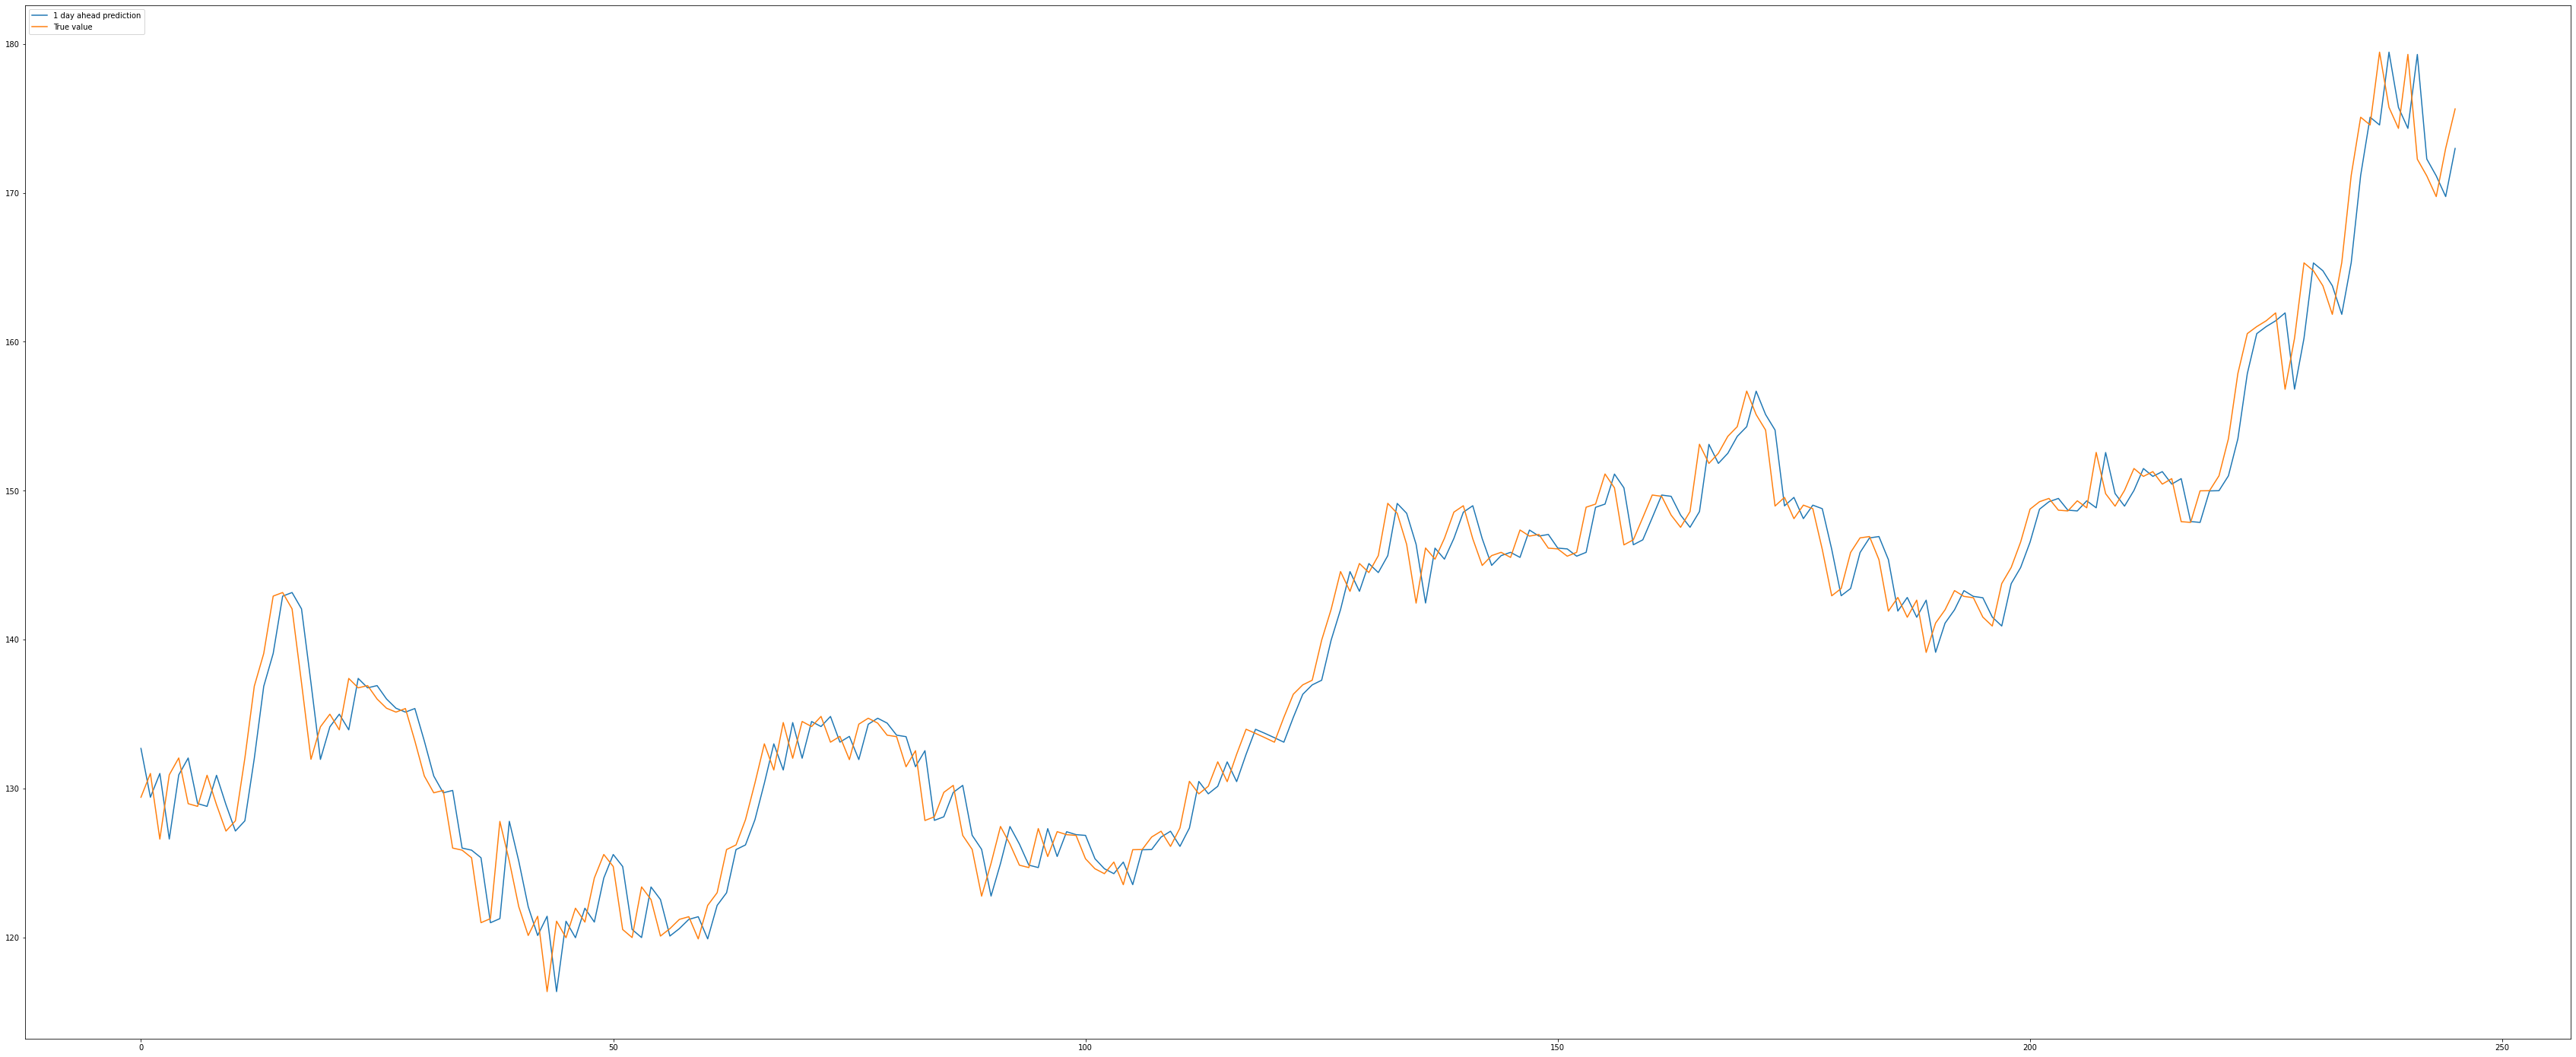

In [5]:
df = pd.read_csv("../data/processed/appl_stock_values.csv")

#split the data
df["Date"] = pd.to_datetime(df["Date"])
df = df.drop(columns=["Open","Volume", "High", "Low", "Unnamed: 0"])
test = df[df["Date"] > datetime.datetime(2021, 1, 1)]
train = df[df["Date"] <= datetime.datetime(2021, 1, 1)]
lag_1_pred = []
#lag_2_pred = []
date = []

test = test.reset_index(drop=True)

for i in range(len(test)):
    model = ARIMA(train["Close"], order = (1,1,1))
    model_fit = model.fit()
    lag_1_pred.append(model_fit.forecast().iloc[0])
    train = train.append({"Close": test.iloc[i]["Close"], "Date":test.iloc[i]["Date"]}, ignore_index=True)

plt.figure(figsize=(60,25))
plt.plot(lag_1_pred, label = "1 day ahead prediction")
plt.plot(test["Close"], label = "True value")
plt.legend(loc="upper left")
plt.show()

In [6]:
model = ARIMA(train["Close"], order = (1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 9397
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -17757.167
Date:                Fri, 31 Dec 2021   AIC                          35522.333
Time:                        17:42:24   BIC                          35550.926
Sample:                             0   HQIC                         35532.042
                               - 9397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.8660    499.937      0.058      0.954    -950.993    1008.725
ar.L1          0.9999      0.000   2902.295      0.000       0.999       1.001
ma.L1         -0.0016      0.011     -0.142      0.8

In [7]:
#lets check the error for a better comparison
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mean_squared_error(lag_1_pred, test["Close"].values.tolist())
mean_absolute_percentage_error(lag_1_pred, test["Close"].values.tolist())

0.012301853947868703